<a href="https://colab.research.google.com/github/ManelSoengas/Python_LM/blob/main/Python_5_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introducció a Machine Learning amb scikit-learn**

---


Ara que ja sabem manipular dades amb pandas, passem a la introducció a Machine Learning amb scikit-learn. En aquest capítol veurem:

1.  Conceptes bàsics de Machine Learning
2.  Preparació de dades per a l'entrenament
3.  Divisió del dataset en entrenament i test
4.  Entrenament d'un model de classificació bàsic
5.  Avaluació del model


**Conceptes Bàsics**

---


El Machine Learning es divideix en dos grans tipus:

1.  **Aprenentatge supervisat** (tenim etiquetes)
Exemples: Classificació (si una persona sobreviu o no), regressió (predir el preu d’una casa)
2.  **Aprenentatge no supervisat** (no tenim etiquetes)
Exemples: Clustering (agrupació de clients segons patrons)
Avui farem una classificació supervisada per predir si un passatger del Titanic sobreviurà.

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

# Carregar dataset Titanic
df = sns.load_dataset("titanic")

# Seleccionar característiques rellevants per a la predicció
df = df[['survived', 'pclass', 'sex', 'age', 'fare', 'embark_town']]



**Per què aquestes variables i no altres?**

---
Caldria mirar, p.ex la correlació entre variable sper determinar la seva rellevància. Ara bé, també pot passar que una variable una relació no línial amb correlació baixa. Aquest fet no es suficient per descartar-la, i seria bo descomposar-la o dividir-la en altres variables.

1.  **Pertinència per a la predicció (correlació amb survived)**

*  sex: És una de les variables més importants, ja que històricament es va
prioritzar la supervivència de dones i nens.
*  pclass: Els passatgers de 1a classe tenien més probabilitats de sobreviure que els de 3a classe.
*  age: Els nens tenien més probabilitats de ser rescatats primer.
*  fare: El preu del bitllet està relacionat amb la classe del passatger i podria influir en la supervivència.
*  embark_town: Lloc d’embarcament podria tenir un efecte indirecte (diferents tipus de passatgers segons la ciutat).
2. **Variables que contenen informació útil (evitar redundància)**

Hem exclòs class perquè és redundant amb pclass (una variable categòrica i una numèrica amb la mateixa informació).
No hem inclòs alive perquè és una versió duplicada de survived (1=viu, 0=mort).
3. **Evitar variables menys útils o difícils d’interpretar**

*  deck (coberta del vaixell) → Té molts valors nuls (NaN) i poca informació significativa.
*  who (home, dona o nen) → Redundant amb age i sex.
*  alone (si viatja sol o no) → Podria ser rellevant, però no tant com altres.

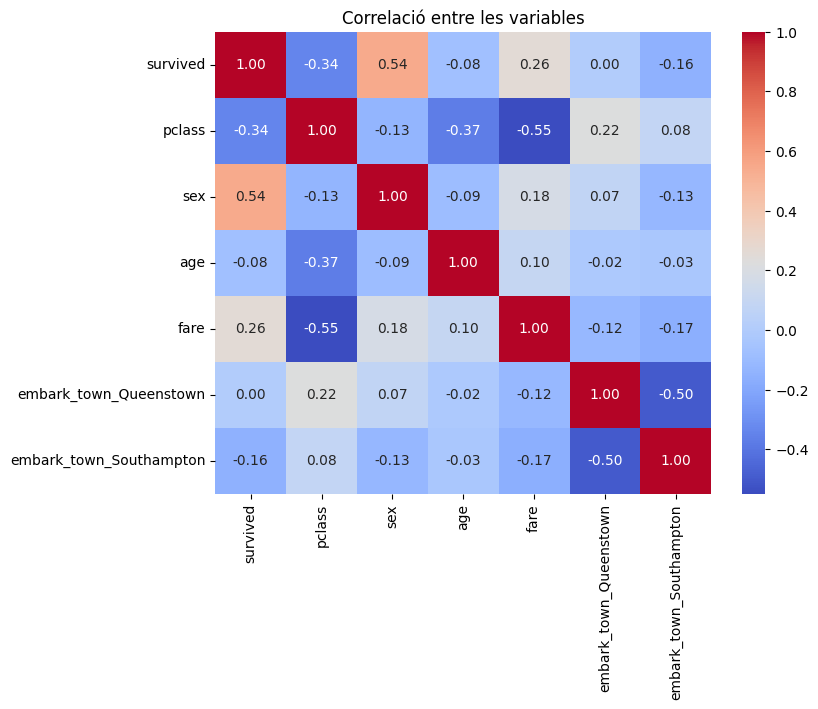

In [2]:
import matplotlib.pyplot as plt

# Convertir les variables categòriques a numèriques per calcular la correlació
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['embark_town'], drop_first=True)

# Matriu de correlació
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlació entre les variables")
plt.show()


In [6]:
# Convertir variables categòriques a numèriques
# Els models de ML treballen millor amb números, així que convertim sex i embark_town en valors numèrics:

df['sex'] = df['sex'].map({'male': 0, 'female': 1})  # Convertir 'sex' a 0 i 1
df = pd.get_dummies(df, columns=['embark_town'], drop_first=True)  # Variables d'embarcament


In [7]:
# Omplir valors nuls

df['age'] = df['age'].fillna(df['age'].mean())
df['fare'] = df['fare'].fillna(df['fare'].mean())


**Divisió en Entrenament i Test**

---


Abans d’entrenar el model, dividim el dataset en dades d’entrenament (80%) i de test (20%).

In [8]:
from sklearn.model_selection import train_test_split

# Separar variables independents (X) i dependents (y)
X = df.drop(columns=['survived'])
y = df['survived']

# Dividir en entrenament (80%) i test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Mida entrenament:", X_train.shape)
print("Mida test:", X_test.shape)


Mida entrenament: (712, 6)
Mida test: (179, 6)


**Entrenament d'un Model de Classificació**

---


Utilitzarem un Random Forest Classifier, un model potent per a classificació.

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Crear i entrenar el model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [10]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("🔹 Precisió mitjana en validació creuada:", scores.mean())


🔹 Precisió mitjana en validació creuada: 0.8062149118487145


**Avaluació del Model**

---


Ara comprovem com de bé funciona el model amb dades noves.
Si la precisió és al voltant del 75%-80%, significa que el model pot predir correctament la supervivència dels passatgers en un 80% dels casos.

In [11]:
from sklearn.metrics import accuracy_score

# Predir sobre el conjunt de test
y_pred = model.predict(X_test)

# Calcular la precisió
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisió del model: {accuracy:.2f}')


Precisió del model: 0.79


**Exercicis**

---


1. Canvia el model i prova una Regressió Logística (LogisticRegression de sklearn.linear_model).
2. Ajusta hiperparàmetres de RandomForestClassifier (ex. max_depth, n_estimators).
3. Prova amb altres variables: Quin impacte té afegir/eliminar característiques com fare?

In [12]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score

In [14]:
from sklearn.model_selection import cross_val_score

# Selección de los algoritmos
names = ["SVM", "Naive Bayes", "LDA", "QDA", "Decision Tree", "Random Forest",
         "Nearest Neighbors", "Neural Networks"]

classifiers = [
    SVC(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    MLPClassifier(alpha=1, max_iter=1000)]

# Aplicar validació creuada i després entrenar sobre tot el conjunt d'entrenament
for name, clf in zip(names, classifiers):
    scores = cross_val_score(clf, X_train, y_train, cv=5)  # Validació creuada
    print(f"{name}: Accuracy CV = {scores.mean():.4f} ± {scores.std():.4f}")

    # Entrenar sobre el conjunt complet d'entrenament i avaluar sobre test
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(f"{name}: Accuracy en test final = {score:.4f}\n")



SVM: Accuracy CV = 0.6643 ± 0.0172
SVM: Accuracy en test final = 0.6536

Naive Bayes: Accuracy CV = 0.7681 ± 0.0357
Naive Bayes: Accuracy en test final = 0.7654

LDA: Accuracy CV = 0.7851 ± 0.0294
LDA: Accuracy en test final = 0.7877

QDA: Accuracy CV = 0.7780 ± 0.0322
QDA: Accuracy en test final = 0.7989

Decision Tree: Accuracy CV = 0.7529 ± 0.0384
Decision Tree: Accuracy en test final = 0.7709

Random Forest: Accuracy CV = 0.8104 ± 0.0152
Random Forest: Accuracy en test final = 0.7933

Nearest Neighbors: Accuracy CV = 0.6799 ± 0.0299
Nearest Neighbors: Accuracy en test final = 0.7039

Neural Networks: Accuracy CV = 0.7850 ± 0.0370
Neural Networks: Accuracy en test final = 0.7877



**Guardar el model entrenat**

---


Desem el model en un fitxer per poder-lo reutilitzar més tard.
Si hem decidit que el millor model és RandomForestClassifier, fem:

In [15]:
import joblib

# Entrenem el model final amb totes les dades d'entrenament
best_model = RandomForestClassifier(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)

# Guardar el model en un fitxer
joblib.dump(best_model, "random_forest_model.pkl")

print("✅ Model guardat com a 'random_forest_model.pkl'")


✅ Model guardat com a 'random_forest_model.pkl'


**Carregar el model desat i fer prediccions**

---


Per utilitzar el model més tard en un altre script o sessió:

In [16]:
# Carregar el model desat
loaded_model = joblib.load("random_forest_model.pkl")

# Provar-lo amb noves dades (exemple amb X_test)
y_pred = loaded_model.predict(X_test)

print("Prediccions del model carregat:", y_pred[:10])  # Mostrar les primeres 10 prediccions


Prediccions del model carregat: [0 0 1 1 0 1 1 0 1 1]


**Provar el model amb noves dades reals**

---


Si vols predir un nou passatger del Titanic, has de donar-li les mateixes característiques que al model.

Exemple d'un passatger nou (dona de 1a classe, 28 anys, tarifa de 100, embarcada a Southampton):

In [17]:
import numpy as np

# Nou passatger (mateix ordre de característiques que X_train)
new_passenger = np.array([[1,  # pclass (1a classe)
                           1,  # sex (femení)
                           28,  # age
                           100,  # fare
                           0, 0]])  # embark_town (0 = no Queenstown, 0 = no Southampton)

# Predir la supervivència
prediction = loaded_model.predict(new_passenger)

# Interpretació de la predicció
if prediction[0] == 1:
    print("🚢✅ El passatger sobreviu!")
else:
    print("🚢❌ El passatger NO sobreviu.")


🚢✅ El passatger sobreviu!


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
